In [1]:
import dtoolcore
import dtoolcore.utils as utils
import time
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import re

In [2]:
rootdir = os.getcwd()

# pat = r'canal_\d+\.\d+_\d+'
pat = r'\d+\.\d+'
path = rootdir+"/dtool_db/"
#print(path)
def get_data_directories(root_dir):
    data_dirs = []
    for root, dirs, files in os.walk(root_dir):
        if root.endswith('/data'):
            data_dirs.append(root)
    return data_dirs

datadir_list = get_data_directories(path)

[ 120.   328.9  537.8  746.7  955.6 1164.4 1373.3 1582.2 1791.1 2000. ]
[-9.25782999e+303              nan              nan              nan
              nan              nan              nan  1.30925581e-250
 -1.71441284e+304              nan              nan -5.84240066e+303
  6.91032283e-310  4.67774207e-310  6.91032281e-310  4.67774207e-310
  6.91032283e-310  4.67774207e-310  6.91033265e-310  6.91031268e-310
  6.91033370e-310  6.91031268e-310  6.91032283e-310  4.67774207e-310
  6.91032283e-310  4.67774207e-310  6.91032283e-310  4.67774207e-310
  6.91032283e-310  4.67774207e-310  6.91032283e-310  4.67774207e-310
  0.00000000e+000  4.44659081e-323  6.91032283e-310  4.67774207e-310
  6.91033258e-310  4.67774207e-310  6.91032282e-310  4.67774207e-310
  6.91032283e-310  4.67774207e-310  0.00000000e+000  4.67774207e-310
  6.91032283e-310  4.67774207e-310  6.91033376e-310  6.91031287e-310
  6.91032283e-310  4.67774207e-310  6.91032283e-310  4.67774207e-310
  6.91032283e-310  4.67774207e-

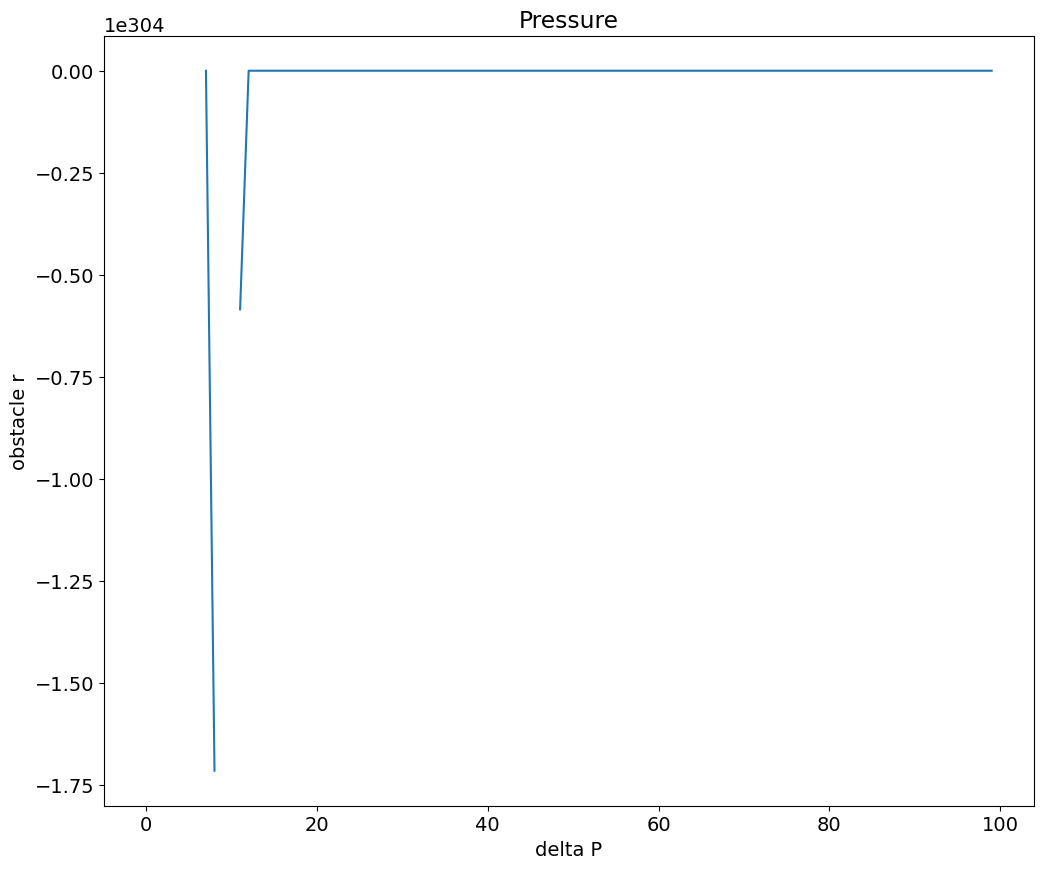

In [42]:
pat = r'\d+\.\d+(?=_)'
pat2 = r'\d+\.\d+(?=/)'
plt.rcParams.update({'font.size': 14})
def plot_press(pt, pt2, file, title, yl='Velocity', legend=True, filename="output.pdf"):
    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title(title)
    
    press_list = []
    
    # First pass: collect unique radii and pressure values
    for i in datadir_list:
        if "parametric2_canal_0.15" not in i:
            continue
        match = re.search(pt2, i)
        if match:
            pressure = float(match.group())
            
            press_list = press_list + [pressure] if pressure not in press_list else press_list


    press = np.sort(np.array(press_list))
    print(press)
    # Create the arr with the correct dimensions
    arr = np.empty((len(press), 100))
    
    # Second pass: fill the arr
    for i in datadir_list:
        if "parametric2_canal_0.22" not in i:
            continue

        match = re.search(pt2, i)
        print("match", i) if match is None else None      
        extracted = float(match.group())
        u = np.loadtxt(i+file)
        u = np.where((u >= -100) & (u <= 100), u, 0) 
        p_index = np.where(np.where(press == extracted))[0]
       
        arr[p_index] = u
    
    print(arr[2,:])
    neg = ax.plot(arr[2,:])
    #ax.contour(arr, colors='red')
    #if legend:
    #    ax.legend()
    ax.set_ylabel(r'obstacle r', fontsize=14)
    ax.set_xlabel(r'delta P', fontsize=14)
    #fig.savefig(filename, format='pdf', dpi=300, bbox_inches='tight')

plot_press(pat, pat2, "/p_courve_0.10/p_courve.txt", "Pressure", yl='P delta', legend=True,filename="pressure_1.pdf")
